In [46]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,x1,x2,y
0,0.0323,0.0244,1
1,0.0887,0.0244,1
2,0.1690,0.0163,1
3,0.2420,0.0000,1
4,0.2420,0.0488,1


In [2]:
# define X and y
X = data.drop(['y'], axis=1)
y = data.loc[:, 'y']
X.head()

,x1,x2
0,0.0323,0.0244
1,0.0887,0.0244
2,0.1690,0.0163
3,0.2420,0.0000
4,0.2420,0.0488


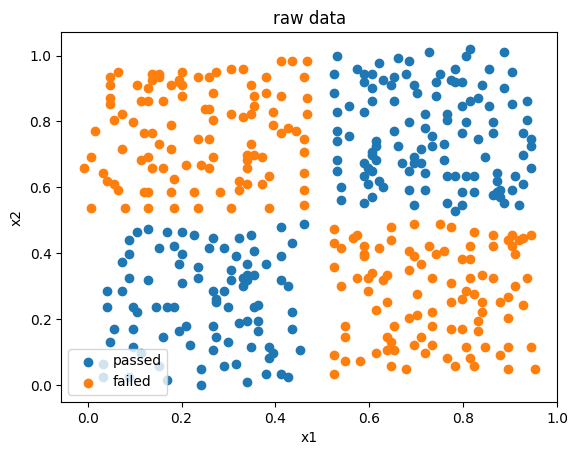

In [4]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure()
passed = plt.scatter(X.loc[:, 'x1'][y==1], X.loc[:, 'x2'][y==1])
failed = plt.scatter(X.loc[:, 'x1'][y==0], X.loc[:, 'x2'][y==0])
plt.legend((passed, failed), ('passed', 'failed'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

In [6]:
# split the data
# 即把33% 的数据用来测试，66% 用来训练
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
print(X_train.shape, X_test.shape, X.shape)

(275, 2) (136, 2) (411, 2)


In [7]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense,Activation

# set up mlp
mlp = Sequential()
# 一开始2个输入节点，隐藏层有20个神经元
mlp.add(Dense(units=20, input_dim=2, activation='sigmoid'))
# 输出层，只有一个节点
# 这里是单分类（即只有一个输出节点）用 sigmoid 好，多分类用其他的好点
mlp.add(Dense(units=1, activation='sigmoid'))

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile the model
# 配置模型参数
# 这里是二分类的，故用 binary
mlp.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
# train the model
mlp.fit(X_train, y_train, epochs=3000)

Epoch 1/3000
9/9 [==============================] - 1s 2ms/step - loss: 0.9238
Epoch 2/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.8900
Epoch 3/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.8595
Epoch 4/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.8318
Epoch 5/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.8074
Epoch 6/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7871
Epoch 7/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7690
Epoch 8/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7533
Epoch 9/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7416
Epoch 10/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7313
Epoch 11/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.7228
Epoch 12/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7157
Epoch 13/3000
9/9 [==============================

9/9 [==============================] - 0s 2ms/step - loss: 0.6920
Epoch 104/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6920
Epoch 105/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6918
Epoch 106/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6918
Epoch 107/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6918
Epoch 108/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6918
Epoch 109/3000
9/9 [==============================] - 0s 3ms/step - loss: 0.6918
Epoch 110/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6917
Epoch 111/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6917
Epoch 112/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6917
Epoch 113/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6918
Epoch 114/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6917
Epoch 115/3000
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 0.6903
Epoch 205/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 206/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 207/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6904
Epoch 208/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 209/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 210/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 211/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6904
Epoch 212/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 213/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 214/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 215/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6901
Epoch 216/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6896
Epoch 306/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 307/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 308/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 309/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 310/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 311/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 312/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 313/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 314/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 315/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 316/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 317/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6890
Epoch 407/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 408/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 409/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6890
Epoch 410/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6890
Epoch 411/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 412/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 413/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 414/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 415/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 416/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 417/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 418/3000
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 0.6885
Epoch 508/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 509/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6884
Epoch 510/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 511/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 512/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 513/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 514/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 515/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6886
Epoch 516/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6884
Epoch 517/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 518/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6884
Epoch 519/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6877
Epoch 609/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6878
Epoch 610/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6879
Epoch 611/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6876
Epoch 612/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6876
Epoch 613/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6877
Epoch 614/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6876
Epoch 615/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6877
Epoch 616/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6878
Epoch 617/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6876
Epoch 618/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6875
Epoch 619/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6875
Epoch 620/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6856
Epoch 710/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6854
Epoch 711/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6854
Epoch 712/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6853
Epoch 713/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6853
Epoch 714/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6852
Epoch 715/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6852
Epoch 716/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6852
Epoch 717/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6852
Epoch 718/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6852
Epoch 719/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6852
Epoch 720/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6850
Epoch 721/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6793
Epoch 811/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6792
Epoch 812/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6791
Epoch 813/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6790
Epoch 814/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6789
Epoch 815/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6788
Epoch 816/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6787
Epoch 817/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6787
Epoch 818/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6786
Epoch 819/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6785
Epoch 820/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6784
Epoch 821/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6782
Epoch 822/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6652
Epoch 912/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6650
Epoch 913/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6649
Epoch 914/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6647
Epoch 915/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6644
Epoch 916/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6643
Epoch 917/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6641
Epoch 918/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6639
Epoch 919/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6637
Epoch 920/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6636
Epoch 921/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6633
Epoch 922/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6631
Epoch 923/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6413
Epoch 1013/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6409
Epoch 1014/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6408
Epoch 1015/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6403
Epoch 1016/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6402
Epoch 1017/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6398
Epoch 1018/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6395
Epoch 1019/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6392
Epoch 1020/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6389
Epoch 1021/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6386
Epoch 1022/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6384
Epoch 1023/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6381
Epoch 1024/3000
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.6090
Epoch 1113/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6085
Epoch 1114/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6081
Epoch 1115/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6078
Epoch 1116/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6075
Epoch 1117/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6070
Epoch 1118/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6067
Epoch 1119/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6063
Epoch 1120/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6060
Epoch 1121/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6055
Epoch 1122/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6052
Epoch 1123/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6049
Epoch 1124/3000
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.5707
Epoch 1213/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.5701
Epoch 1214/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.5696
Epoch 1215/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5691
Epoch 1216/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5687
Epoch 1217/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5685
Epoch 1218/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.5682
Epoch 1219/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5675
Epoch 1220/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.5672
Epoch 1221/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.5667
Epoch 1222/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.5664
Epoch 1223/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5659
Epoch 1224/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.5281
Epoch 1313/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5274
Epoch 1314/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5270
Epoch 1315/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5268
Epoch 1316/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5263
Epoch 1317/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5256
Epoch 1318/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5255
Epoch 1319/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5248
Epoch 1320/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5244
Epoch 1321/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5238
Epoch 1322/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5235
Epoch 1323/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5229
Epoch 1324/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.4837
Epoch 1413/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4830
Epoch 1414/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4827
Epoch 1415/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.4825
Epoch 1416/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4816
Epoch 1417/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4812
Epoch 1418/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4811
Epoch 1419/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4805
Epoch 1420/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4799
Epoch 1421/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4793
Epoch 1422/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4790
Epoch 1423/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4785
Epoch 1424/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.4388
Epoch 1513/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.4383
Epoch 1514/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4379
Epoch 1515/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 1516/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4372
Epoch 1517/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4366
Epoch 1518/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4362
Epoch 1519/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 1520/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4355
Epoch 1521/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4350
Epoch 1522/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4344
Epoch 1523/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 1524/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.3959
Epoch 1613/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3956
Epoch 1614/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3950
Epoch 1615/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3949
Epoch 1616/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3942
Epoch 1617/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3940
Epoch 1618/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.3934
Epoch 1619/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3931
Epoch 1620/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3926
Epoch 1621/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3922
Epoch 1622/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3918
Epoch 1623/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3913
Epoch 1624/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.3551
Epoch 1713/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.3550
Epoch 1714/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3543
Epoch 1715/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3539
Epoch 1716/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3535
Epoch 1717/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3532
Epoch 1718/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3527
Epoch 1719/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3524
Epoch 1720/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.3519
Epoch 1721/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3516
Epoch 1722/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3511
Epoch 1723/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3508
Epoch 1724/3000
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.3166
Epoch 1813/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3162
Epoch 1814/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 1815/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3153
Epoch 1816/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3151
Epoch 1817/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3148
Epoch 1818/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3145
Epoch 1819/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.3140
Epoch 1820/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3137
Epoch 1821/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.3132
Epoch 1822/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3128
Epoch 1823/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3126
Epoch 1824/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.2813
Epoch 1913/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2809
Epoch 1914/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2807
Epoch 1915/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2803
Epoch 1916/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2800
Epoch 1917/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2796
Epoch 1918/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.2793
Epoch 1919/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2789
Epoch 1920/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2785
Epoch 1921/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2782
Epoch 1922/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2781
Epoch 1923/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2777
Epoch 1924/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.2492
Epoch 2013/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2490
Epoch 2014/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 2015/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 2016/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2480
Epoch 2017/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2479
Epoch 2018/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.2475
Epoch 2019/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2473
Epoch 2020/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2468
Epoch 2021/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2465
Epoch 2022/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2463
Epoch 2023/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2459
Epoch 2024/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.2204
Epoch 2113/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2201
Epoch 2114/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2200
Epoch 2115/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 2116/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2193
Epoch 2117/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2192
Epoch 2118/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2187
Epoch 2119/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2185
Epoch 2120/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2184
Epoch 2121/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2185
Epoch 2122/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2177
Epoch 2123/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2177
Epoch 2124/3000
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.1955
Epoch 2213/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1951
Epoch 2214/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1949
Epoch 2215/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1949
Epoch 2216/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 2217/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 2218/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1942
Epoch 2219/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1941
Epoch 2220/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 2221/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1934
Epoch 2222/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1932
Epoch 2223/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1934
Epoch 2224/3000
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 2313/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1740
Epoch 2314/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1738
Epoch 2315/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1737
Epoch 2316/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1734
Epoch 2317/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1733
Epoch 2318/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1731
Epoch 2319/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1728
Epoch 2320/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1727
Epoch 2321/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1725
Epoch 2322/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1723
Epoch 2323/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1722
Epoch 2324/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.1563
Epoch 2413/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1564
Epoch 2414/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1561
Epoch 2415/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1559
Epoch 2416/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1558
Epoch 2417/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1556
Epoch 2418/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1554
Epoch 2419/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1553
Epoch 2420/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1551
Epoch 2421/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1549
Epoch 2422/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1548
Epoch 2423/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1546
Epoch 2424/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.1418
Epoch 2513/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1412
Epoch 2514/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1411
Epoch 2515/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1411
Epoch 2516/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1410
Epoch 2517/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1410
Epoch 2518/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1405
Epoch 2519/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1405
Epoch 2520/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1404
Epoch 2521/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1401
Epoch 2522/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1400
Epoch 2523/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1399
Epoch 2524/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.1290
Epoch 2613/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1288
Epoch 2614/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1287
Epoch 2615/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1286
Epoch 2616/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1284
Epoch 2617/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1284
Epoch 2618/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1282
Epoch 2619/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1281
Epoch 2620/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.1280
Epoch 2621/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1280
Epoch 2622/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1278
Epoch 2623/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1277
Epoch 2624/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.1185
Epoch 2713/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1185
Epoch 2714/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1183
Epoch 2715/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1183
Epoch 2716/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1181
Epoch 2717/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1183
Epoch 2718/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1180
Epoch 2719/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1178
Epoch 2720/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1177
Epoch 2721/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1176
Epoch 2722/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1175
Epoch 2723/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1177
Epoch 2724/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.1097
Epoch 2813/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1096
Epoch 2814/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1095
Epoch 2815/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1094
Epoch 2816/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1094
Epoch 2817/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1093
Epoch 2818/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1092
Epoch 2819/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1093
Epoch 2820/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1092
Epoch 2821/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1090
Epoch 2822/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1089
Epoch 2823/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1088
Epoch 2824/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.1021
Epoch 2913/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 2914/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1020
Epoch 2915/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1020
Epoch 2916/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1020
Epoch 2917/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1018
Epoch 2918/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1017
Epoch 2919/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1018
Epoch 2920/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1016
Epoch 2921/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1015
Epoch 2922/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1015
Epoch 2923/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.1015
Epoch 2924/3000
9/9 [===========

In [41]:
# make prediction and calculate the accuracy
from sklearn.metrics import accuracy_score

# tensorflow 新版本没有 predice_classes 函数
# y_train_predict = mlp.predict_classes(X_train)
# 单分类改用下面的方法
y_train_predict = (mlp.predict(X_train) > 0.5).astype("int64")
# 可以用下面方法（多分类）
# y_train_predict = np.argmax(mlp.predict(X_train), axis=-1)

accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

9/9 [==============================] - 0s 1ms/step
0.9927272727272727


In [42]:
# make prediction based on the test data
y_test_predict = (mlp.predict(X_test) > 0.5).astype("int64")
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

5/5 [==============================] - 0s 2ms/step
0.9926470588235294


In [43]:
y_train_predict_form = pd.Series(i[0] for i in y_train_predict)
print(y_train_predict_form)

0      1
1      0
2      0
3      0
4      1
      ..
270    0
271    0
272    1
273    1
274    0
Length: 275, dtype: int64


In [49]:
# genrate new data for plot
xx, yy = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0,1,0.01))
x_range = np.c_[xx.ravel(), yy.ravel()]
y_range_predict = (mlp.predict(x_range) > 0.5).astype("int64")
print(type(y_range_predict))

313/313 [==============================] - 0s 853us/step
<class 'numpy.ndarray'>


In [50]:
# format the output
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)
print(y_range_predict_form)

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int64


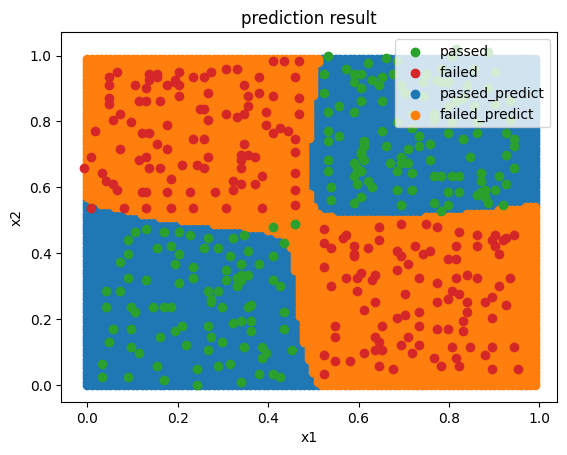

In [52]:
fig2 = plt.figure()
passed_predict = plt.scatter(x_range[:, 0][y_range_predict_form==1],x_range[:, 1][y_range_predict_form==1])
failed_predict = plt.scatter(x_range[:, 0][y_range_predict_form==0],x_range[:, 1][y_range_predict_form==0])

passed = plt.scatter(X.loc[:, 'x1'][y==1], X.loc[:, 'x2'][y==1])
failed = plt.scatter(X.loc[:, 'x1'][y==0], X.loc[:, 'x2'][y==0])
plt.legend((passed, failed, passed_predict, failed_predict), ('passed', 'failed', 'passed_predict', 'failed_predict'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('prediction result')
plt.show()